In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

## data uploading

In [29]:
netflix = pd.read_csv("C:/Users/wypyc/Desktop/semestr 5/szeregi/raport2/data/netflix_prices.csv") 

netflix = netflix[["Date","Open"]]
netflix = netflix.set_index("Date")

initial_size = len(netflix)

początek 2014 koniec 2021

Text(0.5, 1.0, 'Wykres zależności ceny otwarcia od czasu')

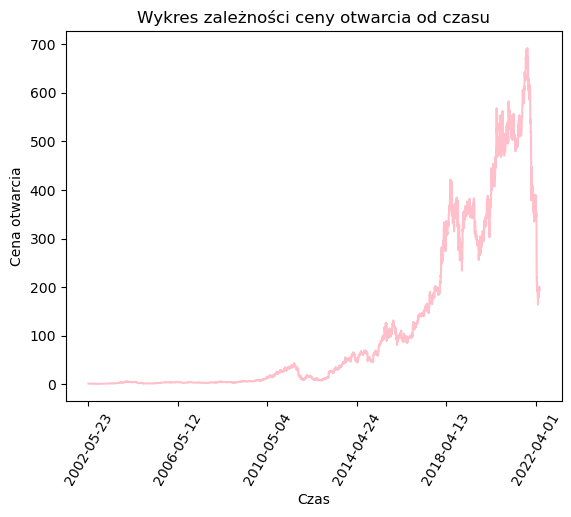

In [30]:
netflix.plot(color = "pink", legend = False)
plt.xlabel("Czas")
plt.ylabel("Cena otwarcia")
plt.xticks(rotation=60)
plt.title("Wykres zależności ceny otwarcia od czasu")

## cut the data

Text(0.5, 1.0, 'Wykres zależności ceny otwarcia od czasu')

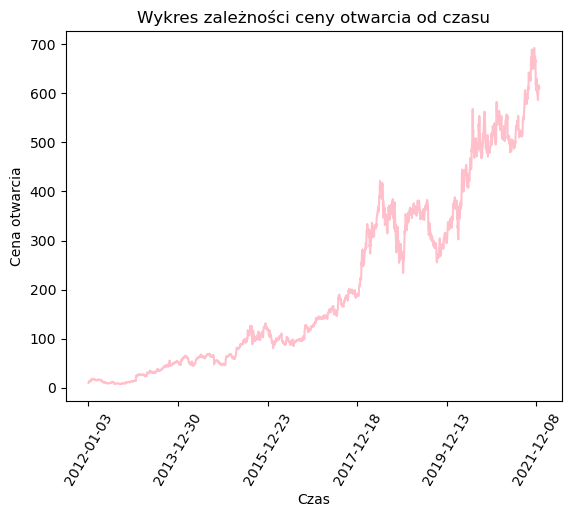

In [31]:
netflix_cut = netflix[netflix.index >= "2012-01-01"]
netflix_cut = netflix_cut[netflix_cut.index <= "2021-12-31"]
initial_cut_size = len(netflix_cut)

netflix_cut.plot(color = "pink", legend = False)
plt.xlabel("Czas")
plt.ylabel("Cena otwarcia")
plt.xticks(rotation=60)
plt.title("Wykres zależności ceny otwarcia od czasu")

## working on missing dates

In [32]:
#change string into datetime type
netflix.index = pd.to_datetime(netflix.index)

#all dates between two ones
all_dates = pd.date_range(netflix.index[0],netflix.index[-1])

#all except these in netflix dataframe
no_netflix_dates = all_dates.difference(netflix.index)

# add missing dates to existing netflix datafra
netflix = netflix.reindex(all_dates, fill_value = 0) #any missing values in the series are filled with 0

In [33]:
len(no_netflix_dates)

2273

In [34]:
len(netflix)

7317

In [35]:
latter_size = len(netflix)
latter_size

print(initial_size,latter_size, latter_size - initial_size)

5044 7317 2273


In [36]:
netflix.Open.value_counts()[0] == latter_size - initial_size ## 0 is only for previous missing values

True

In [37]:
MA_netflix = netflix
MA_netflix["Open"] = MA_netflix["Open"].rolling(30).mean()
MA_netflix
len(MA_netflix)

7317

<AxesSubplot:>

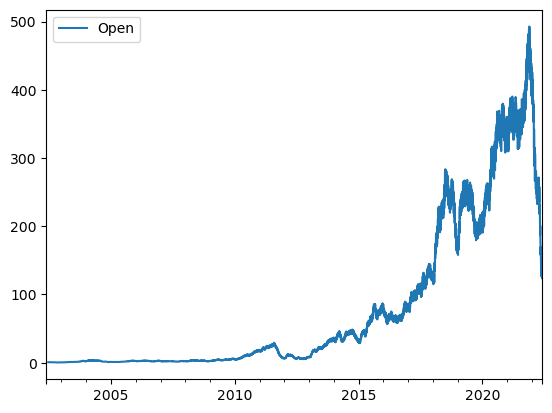

In [38]:
MA_netflix.plot()

In [39]:
MA_cut_netflix = MA_netflix[MA_netflix.index >= "2012-01-01"]
MA_cut_netflix = MA_cut_netflix[MA_cut_netflix.index <= "2021-12-31"]
latter_cut_size = len(MA_cut_netflix)
latter_cut_size

3653

In [40]:
no_MA_cut = netflix[netflix.index >= "2012-01-01"]
no_MA_cut = no_MA_cut[no_MA_cut.index <= "2021-12-31"]
len(no_MA_cut)

3653

In [42]:
print(initial_cut_size, latter_cut_size, latter_cut_size - initial_cut_size)

2517 3653 1136


In [43]:
for i in range(len(no_MA_cut)):
    if no_MA_cut.Open[i] == 0:
        no_MA_cut.Open[i] = MA_cut_netflix.Open[i] 

In [44]:
no_MA_cut.head()

,Open
2012-01-01,6.375476
2012-01-02,6.375476
2012-01-03,6.710143
2012-01-04,6.735857
2012-01-05,6.780333


<AxesSubplot:>

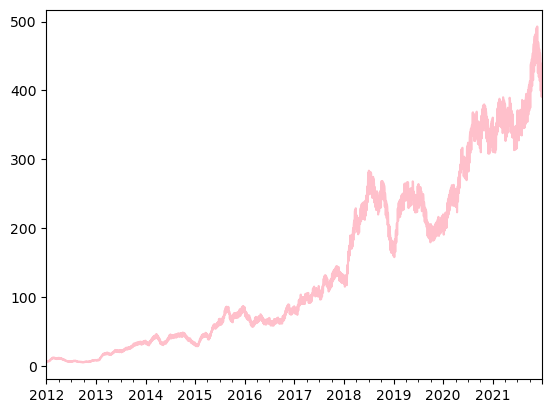

In [45]:
no_MA_cut.plot(color = "pink", legend = False)

## training and testing dataset

In [46]:
training = no_MA_cut[:-300]
test = no_MA_cut[-300:]

Text(0.5, 1.0, 'Wykres zależności ceny otwarcia od czasu dla zbioru treningowego')

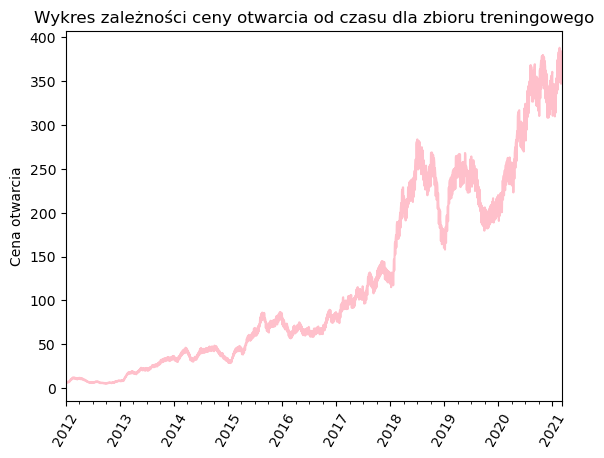

In [47]:
training.plot(color = "pink", legend = False)
plt.ylabel("Cena otwarcia")
plt.xticks(rotation=60)
plt.title("Wykres zależności ceny otwarcia od czasu dla zbioru treningowego")